# Time

## Distribution of publications per year 

Here, only data starting in 1986 is shown (the bibliography was launched in 1992).

In [6]:
# === Imports === 

import re 
import seaborn as sns
from matplotlib import pyplot as plt
from os.path import join
from os.path import realpath, dirname
import os
from lxml import etree
from io import StringIO, BytesIO
from collections import Counter
import pandas as pd
import numpy as np


# === Files and parameters === 

wdir = join("/", "media", "christof", "Data", "Github", "christofs", "BIB18")
bibdatafile = join(wdir, "data", "BIB18_Zotero-RDF.rdf") 
#bibdatafile = join(wdir, "data", "BIB18_Zotero-RDF_TEST.rdf") 

namespaces = {
    "foaf" : "http://xmlns.com/foaf/0.1/",
    "bib" : "http://purl.org/net/biblio#",
    "dc" : "http://purl.org/dc/elements/1.1/",
    "z" : "http://www.zotero.org/namespaces/export#",
    "rdf" : "http://www.w3.org/1999/02/22-rdf-syntax-ns#"
    }

# === Load the dataset === 

def read_xml(bibdatafile): 
    bibdata = etree.parse(bibdatafile)
    return bibdata
bibdata = read_xml(bibdatafile)

There are 64169 instances of publication years mentioned in the dataset.
There are 38 different years mentioned in the dataset.


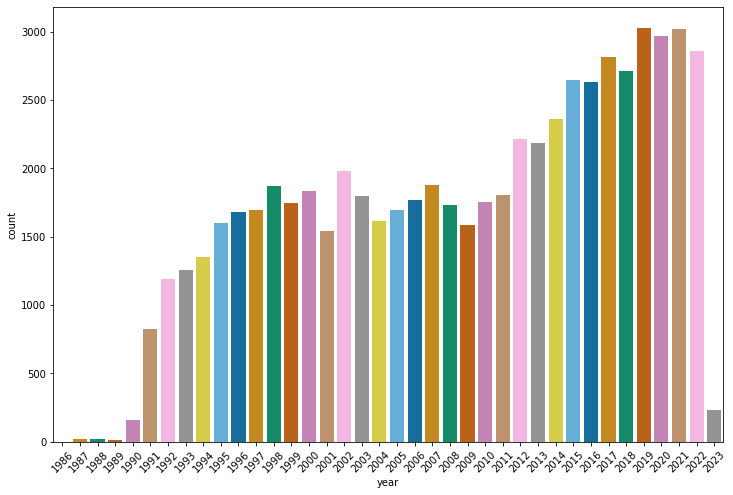

In [11]:

def get_pubyears(bibdata): 
    # Setting things up
    pubyears = []

    # Find all the instances of publication dates
    xpath = "//dc:date/text()"
    pubyears = bibdata.xpath(xpath, namespaces=namespaces)

    # Count the occurrences, find the 10 most frequently mentioned publication dates
    pubyear_counts = Counter(pubyears)
    pubyear_counts = dict(sorted(pubyear_counts.items(), reverse=False))

    # Filter data to clean it
    pubyear_counts = pd.DataFrame.from_dict(pubyear_counts, orient="index").reset_index().rename(mapper={"index":"year", 0 : "count"}, axis="columns")    #pubyear_counts = pubyear_counts[pubyear_counts[0] == 1991]
    pubyear_counts = pubyear_counts[pubyear_counts["year"].str.isnumeric()]
    pubyear_counts.set_index("year", inplace=True)
    # Remove erroneous years (to be corrected in the data)
    pubyear_counts.drop(["134", "207", "22", "30", "42", "58", "76", "78", "20", "201"], inplace=True)
    # Remove less relevant years (optional, of course)
    pubyear_counts.drop(["1815", "1834", "1891", "1932", "1945", "1957", "1961", "1969", "1973", "1974", "1975", "1978", "1979", "1981", "1982", "1983", "1984"], inplace=True)
    pubyear_counts.reset_index(inplace=True)
    #print(pubyear_counts.head())

    # Display some key figures
    print("There are " + str(len(pubyears)) + " instances of publication years mentioned in the dataset.")
    print("There are " + str(len(pubyear_counts)) + " different years mentioned in the dataset.")

    return pubyear_counts


def visualize_pubyears(pubyear_counts):
    plt.figure(figsize=(12,8))
    pal = sns.color_palette("colorblind", len(pubyear_counts))
    fig = sns.barplot(
        data = pubyear_counts, 
        x="year", 
        y="count",
        palette = pal,
        )
    fig.set_xticklabels(fig.get_xticklabels(), rotation=45)
    plt.savefig(join(wdir, "figures", "pubyear_counts.png"), dpi=300)


pubyear_counts = get_pubyears(bibdata)
visualize_pubyears(pubyear_counts)